In [284]:
import ccxt
import pandas as pd

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import calendar 

In [290]:
# I want to use the filtered_df csv file I have and extract it as a dataframe

filtered_df = pd.read_csv('C:/Users/20212397/Desktop/Y2Q4/DC2/filtered_df.csv')
filtered_df.head()

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Month num,Year,Month name,Ward new
0,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.201877,51.655538,On or near High Street,E01000248,Barnet 001A,Burglary,12,2010,Dec,Mill Hill
1,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.207853,51.654317,On or near The Avenue,E01000248,Barnet 001A,Burglary,12,2010,Dec,Mill Hill
2,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.202510,51.656348,On or near Bruce Road,E01000248,Barnet 001A,Burglary,12,2010,Dec,Mill Hill
3,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.206779,51.654768,On or near The Drive,E01000248,Barnet 001A,Burglary,12,2010,Dec,Mill Hill
4,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.209537,51.655223,On or near Marriott Road,E01000249,Barnet 001B,Burglary,12,2010,Dec,Mill Hill


In [301]:
monthly_grouped_df = filtered_df.sort_values(['Year','Month num'],ascending=False).groupby(['Year', 'Month num']).count()

# cget the number of burglaries per month from the filtered_df dataframe and add it to the monthly_grouped_df dataframe as a new column
monthly_grouped_df['nr of burglaries'] = filtered_df.groupby(['Year', 'Month num']).size()

# Rename columns, select rows with data and set datetime index
monthly_grouped_df['day'] = 1
monthly_grouped_df = monthly_grouped_df.reset_index()
monthly_grouped_df = monthly_grouped_df[(monthly_grouped_df['Year']>=2011) | ((monthly_grouped_df['Year'] == 2010) & (monthly_grouped_df['Month num']==12))]
monthly_grouped_df = monthly_grouped_df.rename(columns={'Month num': 'month', 'Year': 'year'})
monthly_grouped_df['Date'] = pd.to_datetime(monthly_grouped_df[['year', 'month', 'day']])
monthly_grouped_df = monthly_grouped_df.set_index(pd.DatetimeIndex(monthly_grouped_df['Date']))
monthly_grouped_df['ds'] = monthly_grouped_df['Date']
monthly_grouped_df['y'] = monthly_grouped_df['nr of burglaries']

In [302]:
monthly_grouped_df

,year,month,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Month name,Ward new,nr of burglaries,day,Date,ds,y
Date,,,,,,,,,,,,,,,,,,
2010-12-01,2010,12,372,372,372,372,372,372,372,372,372,372,359,372,1,2010-12-01,2010-12-01,372
2011-01-01,2011,1,486,486,486,486,486,486,486,486,486,486,463,486,1,2011-01-01,2011-01-01,486
2011-02-01,2011,2,403,403,403,403,403,403,403,403,403,403,385,403,1,2011-02-01,2011-02-01,403
2011-03-01,2011,3,408,408,408,408,408,408,408,408,408,408,403,408,1,2011-03-01,2011-03-01,408
2011-04-01,2011,4,414,0,414,414,414,414,414,414,414,414,401,414,1,2011-04-01,2011-04-01,414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,2022,11,246,246,246,246,246,246,246,246,246,246,231,246,1,2022-11-01,2022-11-01,246
2022-12-01,2022,12,228,228,228,228,228,228,228,228,228,228,221,228,1,2022-12-01,2022-12-01,228
2023-01-01,2023,1,242,242,242,242,242,242,242,242,242,242,237,242,1,2023-01-01,2023-01-01,242


In [303]:
# Divide test and train data
train_data = monthly_grouped_df[monthly_grouped_df['year']<2018]
test_data = monthly_grouped_df[(monthly_grouped_df['year']>2017) & (monthly_grouped_df['year'] <2020)]
test_data['ds'] = test_data['Date']
train_data['ds'] = train_data['Date']
test_data['y'] = test_data['nr of burglaries']
train_data['y'] = train_data['nr of burglaries']
train_data

C:\Users\20212397\AppData\Local\Temp\ipykernel_26256\4256134342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ds'] = test_data['Date']
C:\Users\20212397\AppData\Local\Temp\ipykernel_26256\4256134342.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['ds'] = train_data['Date']
C:\Users\20212397\AppData\Local\Temp\ipykernel_26256\4256134342.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,year,month,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Month name,Ward new,nr of burglaries,day,Date,ds,y
Date,,,,,,,,,,,,,,,,,,
2010-12-01,2010,12,372,372,372,372,372,372,372,372,372,372,359,372,1,2010-12-01,2010-12-01,372
2011-01-01,2011,1,486,486,486,486,486,486,486,486,486,486,463,486,1,2011-01-01,2011-01-01,486
2011-02-01,2011,2,403,403,403,403,403,403,403,403,403,403,385,403,1,2011-02-01,2011-02-01,403
2011-03-01,2011,3,408,408,408,408,408,408,408,408,408,408,403,408,1,2011-03-01,2011-03-01,408
2011-04-01,2011,4,414,0,414,414,414,414,414,414,414,414,401,414,1,2011-04-01,2011-04-01,414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-01,2017,8,309,309,309,309,309,309,309,309,309,309,296,309,1,2017-08-01,2017-08-01,309
2017-09-01,2017,9,259,259,259,259,259,259,259,259,259,259,247,259,1,2017-09-01,2017-09-01,259
2017-10-01,2017,10,305,305,305,305,305,305,305,305,305,305,291,305,1,2017-10-01,2017-10-01,305


In [304]:
test_data.shape

(24, 18)

In [305]:
train_data.shape

(85, 18)

In [306]:
# Extract the relevant columns from the dataset
train_data = train_data[['ds', 'y']]
test_data = test_data[['ds', 'y']]

In [307]:
import tensorflow as tf
import sklearn
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

In [308]:
# Normalize the data using MinMaxScaler:
scaler = MinMaxScaler()
train_data['y'] = scaler.fit_transform(train_data[['y']])
test_data['y'] = scaler.transform(test_data[['y']])


C:\Users\20212397\AppData\Local\Temp\ipykernel_26256\1213160809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = scaler.fit_transform(train_data[['y']])


In [360]:
# Convert the data to sequences for LSTM input:

def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 12  # Adjust as needed
X_train, y_train = create_sequences(train_data['y'], sequence_length)
X_test, y_test = create_sequences(test_data['y'], sequence_length)

In [361]:
# Build and train the LSTM model:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=60, batch_size=12)

Epoch 1/60
7/7 [==============================] - 1s 4ms/step - loss: 0.1156
Epoch 2/60
7/7 [==============================] - 0s 3ms/step - loss: 0.0712
Epoch 3/60
7/7 [==============================] - 0s 4ms/step - loss: 0.0366
Epoch 4/60
7/7 [==============================] - 0s 3ms/step - loss: 0.0419
Epoch 5/60
7/7 [==============================] - 0s 4ms/step - loss: 0.0355
Epoch 6/60
7/7 [==============================] - 0s 3ms/step - loss: 0.0329
Epoch 7/60
7/7 [==============================] - 0s 3ms/step - loss: 0.0316
Epoch 8/60
7/7 [==============================] - 0s 3ms/step - loss: 0.0318
Epoch 9/60
7/7 [==============================] - 0s 3ms/step - loss: 0.0319
Epoch 10/60
7/7 [==============================] - 0s 3ms/step - loss: 0.0316
Epoch 11/60
7/7 [==============================] - 0s 4ms/step - loss: 0.0315
Epoch 12/60
7/7 [==============================] - 0s 3ms/step - loss: 0.0311
Epoch 13/60
7/7 [==============================] - 0s 3ms/step - loss: 0.

In [362]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

1/1 [==============================] - 0s 22ms/step


In [363]:
# rescale predictions to the original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [364]:
# rescale the expected output to the original scale 
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

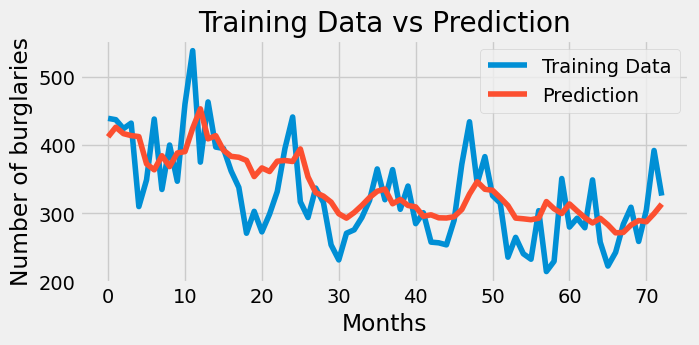

In [365]:
# Plot the predictions vs the expected output on the training data using the dummy variables for the month

plt.figure(figsize=(7, 3))
plt.plot(y_train[0], label='Training Data')
plt.plot(train_predictions[:,0], label='Prediction')
plt.title('Training Data vs Prediction')
# add labels to the axes
plt.xlabel('Months')
plt.ylabel('Number of burglaries')


plt.legend()
plt.show()


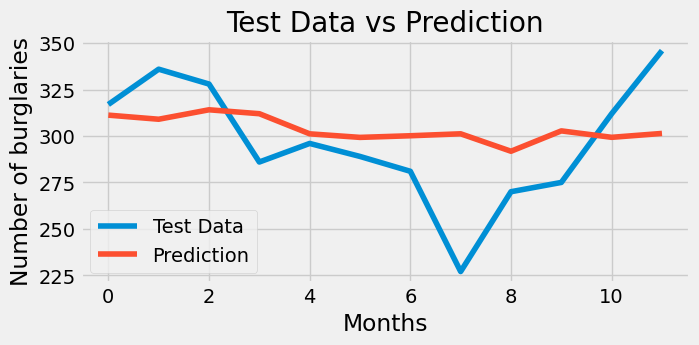

In [366]:
# Plot the predictions vs the expected output on the test data

plt.figure(figsize=(7, 3))
plt.plot(y_test[0], label='Test Data')
plt.plot(test_predictions[:,0], label='Prediction')
plt.title('Test Data vs Prediction')
# add labels to the axes
plt.xlabel('Months')
plt.ylabel('Number of burglaries')
plt.legend()
plt.show()

#dummy vars on the months (12 months so 1 dummy vars)



In [367]:
# Calculate the Mean Absolute Error of the predictions on the test data
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test[0], test_predictions[:,0])


24.021570841471355

In [368]:
# Calculate the Root Mean Squared Error of the predictions on the test data
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test[0], test_predictions[:,0]))


30.31839331892834

In [369]:
# Calculate the Mean Absolute Percentage Error of the predictions on the test data
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(y_test[0], test_predictions[:,0])

8.591551154674375

In [370]:
# calculate the r squared value of the predictions on the test data
from sklearn.metrics import r2_score
r2_score(y_test[0], test_predictions[:,0])

0.08558933248911393